<a href="https://colab.research.google.com/github/LindsClar/Capstone_2/blob/main/27_3_Capstone_Two_Pre_processing_and_Training_Data_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
#import packages normal backages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the Data

In [3]:
#read CSV files
df = pd.read_csv('/content/USRealEstateTrends.csv')

In [4]:
#Analyze information
df.head()

,RegionID,SizeRank,RegionName,StateName,2018-02-HomeValue,2018-02-DaysPending,2018-02-CutRaw,2018-03-HomeValue,2018-03-DaysPending,2018-03-CutRaw,...,2024-02-CutRaw,2024-03-HomeValue,2024-03-DaysPending,2024-03-CutRaw,2024-04-HomeValue,2024-04-DaysPending,2024-04-CutRaw,2024-05-HomeValue,2024-05-DaysPending,2024-05-CutRaw
0,102001,0,United States,NaN,225746.614318,52.0,7600.0,227155.648994,48.0,8900.0,...,10000.0,357374.362080,42.0,10000.0,359240.114070,38.0,10000.0,360681.294250,37.0,10000.0
1,394913,1,"New York, NY",NY,468313.430126,68.0,16000.0,470102.249154,63.0,19751.5,...,25000.0,646508.747102,55.0,25000.0,652619.099940,51.0,26000.0,657279.223513,47.0,30000.0
2,753899,2,"Los Angeles, CA",CA,629019.165765,33.0,20000.0,636850.139417,31.0,20000.0,...,30000.5,952665.578913,32.0,34000.0,956266.687926,29.0,40012.0,962388.491425,28.0,40000.0
3,394463,3,"Chicago, IL",IL,229741.266973,52.0,8000.0,231317.183706,42.0,9100.0,...,10000.0,316875.294320,29.0,10000.0,319764.144323,25.0,10000.0,321897.252361,23.0,10000.0
4,394514,4,"Dallas, TX",TX,241533.231800,46.0,8562.0,243401.180622,42.0,9900.0,...,10000.0,379972.349667,42.0,10000.0,380957.392395,38.0,10000.0,381103.625851,38.0,10000.0


# Evalutating and Organizing the Data

In [5]:
#clean/fill missing data
#rename column name
df.rename(index=str, columns={'RegionName' : 'Location', 'StateName':'State'}, inplace=True)

#dropping the not needed
df.dropna(inplace=True)

#identifying missing values
df.isna().sum()

,0
RegionID,0
SizeRank,0
Location,0
State,0
2018-02-HomeValue,0
...,...
2024-04-DaysPending,0
2024-04-CutRaw,0
2024-05-HomeValue,0
2024-05-DaysPending,0


In [6]:
#Melting Data - melted data allows you to split the dataset by time
df_melt=pd.melt(df, id_vars=['RegionID','SizeRank','Location','State',], var_name='Year_Month_Parameters', value_name='Values')

df_melt[['Year', 'Month_Parameters']] = df_melt['Year_Month_Parameters'].str.split('-', expand=True, n=1)
df_melt.drop('Year_Month_Parameters', axis=1, inplace=True)

#Organize so melted DF shows a column of month
df_melt[['Month', 'Parameters']] = df_melt['Month_Parameters'].str.split('-', expand=True, n=1)
df_melt.drop(columns = ['Month_Parameters'], inplace=True)

df_melt.head()


,RegionID,SizeRank,Location,State,Values,Year,Month,Parameters
0,394913,1,"New York, NY",NY,468313.430126,2018,02,HomeValue
1,753899,2,"Los Angeles, CA",CA,629019.165765,2018,02,HomeValue
2,394463,3,"Chicago, IL",IL,229741.266973,2018,02,HomeValue
3,394514,4,"Dallas, TX",TX,241533.231800,2018,02,HomeValue
4,394692,5,"Houston, TX",TX,208651.872272,2018,02,HomeValue


In [7]:
# Pivot the DataFrame to have measures as columns
df_reorganized = df_melt.pivot_table(index=['RegionID','SizeRank','Location','State','Year','Month'], columns='Parameters', values='Values').reset_index()
df_reorganized.head(5)

Parameters,RegionID,SizeRank,Location,State,Year,Month,CutRaw,DaysPending,HomeValue
0,394308,64,"Albany, NY",NY,2018,02,5100.0,64.0,218876.519605
1,394308,64,"Albany, NY",NY,2018,03,7000.0,62.0,219792.863791
2,394308,64,"Albany, NY",NY,2018,04,8000.0,54.0,220505.058669
3,394308,64,"Albany, NY",NY,2018,05,9000.0,45.0,221526.705984
4,394308,64,"Albany, NY",NY,2018,06,9100.0,47.0,222479.931387


In [8]:
#focus to CA  - filter the DF
CA = df_reorganized.loc[df_reorganized['State']=='CA']

In [9]:
#Correcting time
CA['Date'] = pd.to_datetime(CA['Year'].astype(str) + '-' + CA['Month'].astype(str))
print(CA['Date'].head())

304   2018-02-01
305   2018-03-01
306   2018-04-01
307   2018-05-01
308   2018-06-01
Name: Date, dtype: datetime64[ns]


<ipython-input-9-870d248f46d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA['Date'] = pd.to_datetime(CA['Year'].astype(str) + '-' + CA['Month'].astype(str))


In [10]:
CA.head()

Parameters,RegionID,SizeRank,Location,State,Year,Month,CutRaw,DaysPending,HomeValue,Date
304,394357,63,"Bakersfield, CA",CA,2018,02,7000.0,51.0,212531.666950,2018-02-01
305,394357,63,"Bakersfield, CA",CA,2018,03,7100.0,48.0,213905.260766,2018-03-01
306,394357,63,"Bakersfield, CA",CA,2018,04,6000.0,46.0,214996.109254,2018-04-01
307,394357,63,"Bakersfield, CA",CA,2018,05,7600.0,47.0,216057.814209,2018-05-01
308,394357,63,"Bakersfield, CA",CA,2018,06,8000.0,48.0,217117.256125,2018-06-01


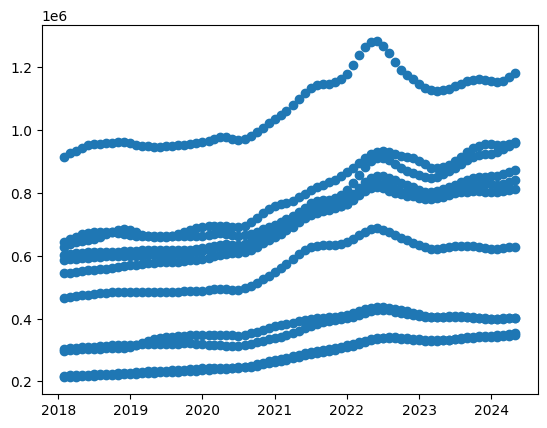

In [11]:
import matplotlib.pyplot as plt

plt.scatter(CA['Date'], CA['HomeValue'])

In [12]:
#Locating the # of unique values
CA["Location"].nunique()
CA["Location"].unique()

array(['Bakersfield, CA', 'Chico, CA', 'Oxnard, CA', 'Salinas, CA',
       'San Diego, CA', 'San Francisco, CA', 'Santa Rosa, CA',
       'Truckee, CA', 'Visalia, CA', 'Los Angeles, CA', 'Sonora, CA'],
      dtype=object)

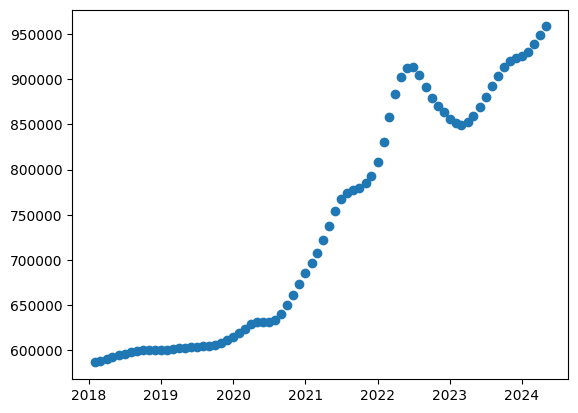

In [13]:
#Focusing on one city homevalues that were consistly recoreded for the State of CA
CA_SD = CA[CA['Location']=='San Diego, CA']

plt.scatter(CA_SD['Date'], CA_SD['HomeValue'])

In [14]:
CA_SD.info()

CA_SD['Date'] = CA_SD['Date'].map(pd.Timestamp.toordinal)

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 6916 to 6991
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionID     76 non-null     int64         
 1   SizeRank     76 non-null     int64         
 2   Location     76 non-null     object        
 3   State        76 non-null     object        
 4   Year         76 non-null     object        
 5   Month        76 non-null     object        
 6   CutRaw       76 non-null     float64       
 7   DaysPending  76 non-null     float64       
 8   HomeValue    76 non-null     float64       
 9   Date         76 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 6.5+ KB


<ipython-input-14-72ef459dbd8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_SD['Date'] = CA_SD['Date'].map(pd.Timestamp.toordinal)


# Splitting the Data

In [15]:
#defining X and y

X = CA_SD[['Date']]
y = CA_SD['HomeValue']

In [16]:
#import library
from sklearn.model_selection import train_test_split

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=False)

# Modeling

 Now we'll be testing and implimenting different models to inspect home value increate.


Linear Regression -

Data Preparation for Linear Regression
best fit curve or line representing the relationship between these two variables. If the relation between dependent variable and independent variable is a straight line or establishing a linear relationship

In [17]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [18]:
clf.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = clf.predict(X_test)

In [20]:
y_test.head()

,HomeValue
6969,913153.036869
6970,904947.747440
6971,891490.618975
6972,879394.082138
6973,870207.266855


In [21]:
clf.score(X_test, y_test)

0.02507934596610384

This demonstates a really low predictive accuracy using linear Regression.

In [22]:
print(f'This is the R2 Score : {clf.score(X_test, y_test)}')

This is the R2 Score : 0.02507934596610384


In [23]:
#import to mean squared error
from sklearn.metrics import mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'This is the root of the Mean Squared Error : {rmse}')

This is the root of the Mean Squared Error : 32419.459238149804


In [24]:
#r2
r2 = r2_score(y_test, y_pred)
print(f'This is the R2 Score : {r2}')

This is the R2 Score : 0.02507934596610384


In [25]:
#testing the length before plotting the data
print(len(X_test), len(y_test), len(y_pred))

23 23 23


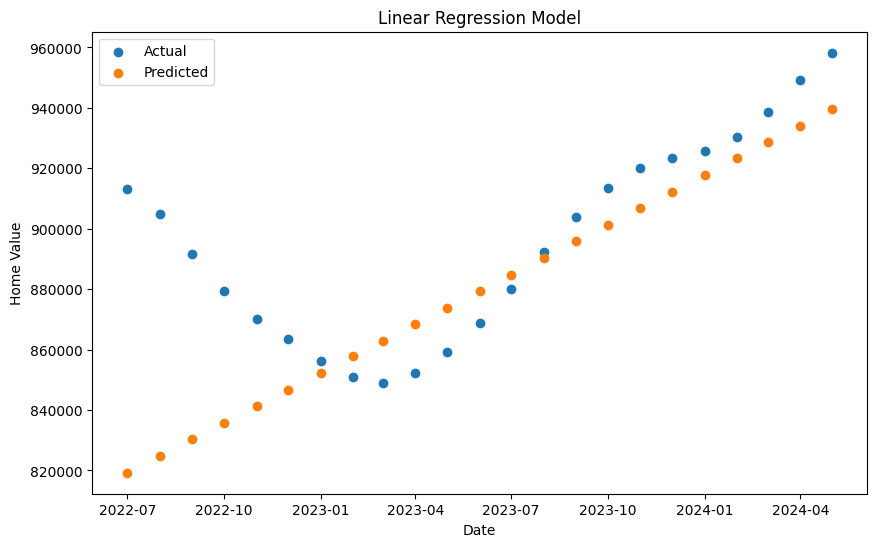

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test.map(pd.Timestamp.fromordinal), y_test)
plt.scatter(X_test.map(pd.Timestamp.fromordinal), y_pred)
plt.xlabel('Date')
plt.ylabel('Home Value')
plt.title('Linear Regression Model')
plt.legend(['Actual', 'Predicted'])
plt.show()

# Conclusion

The visualization of the Linear Regression Model shows that external factors influenced the actual data of the properties sold starting from July 2022, where there is a dip that hits its lowest point around March 2023. Eventually, the actual data surpasses the prediction plots.

This is promising for modeling how well the properties perform and how they typically sustain their value. I would note that external variables affecting the market are somewhat worrisome, but overall, this is a promising start to understanding the stability of the property market in San Diego.